# Séparateur à vaste marge (SVM) : les noyaux
**Carnet 2 de 4**

Les séparateurs à vaste marge (SVM) sont de puissants algorithmes d’apprentissage-machine supervisé, qui excellent en matière de classification et de régression. Nous verrons dans ce tutoriel des points de données qui sont tellement dispersés qu’il est impossible de les séparer en utilisant un hyperplan linéaire. La fonction noyau des SVM permet de résoudre les problèmes de séparation non linaire.

Le **Carnet 2 des SVM sur les noyaux** introduit le noyau comme fonction permettant la cartographie de données à une dimension supérieure pour pouvoir les séparer. Vous avez découvert dans le Carnet 1 des SVM sur la régularisation que la fonction « make_blobs » génère des points de données dans un espace multidimensionnel. Si elle crée par défaut un jeu de données 2D, vous pouvez spécifier le nombre voulu de caractéristiques (n_features) pour générer des données de plus grande dimension.

Un **noyau** transforme un espace de données d’entrée de petite dimension en un espace de plus grande dimension. Il convertit les problèmes de séparation non linéaire en problèmes linéairement séparables, en leur conférant une plus grande dimension. L’astuce du noyau permet d’obtenir un classificateur plus précis puisque les hypothèses de linéarité ne s’appliquent pas souvent aux jeux de données relevant du monde réel. Tous comme les événements représentés par les points de données, les jeux de données sont désordonnés : ils contiennent des variations aléatoires, des erreurs, des anomalies ou des modèles non linéaires complexes. Ces complexités génèrent du « bruit » au sein de jeux de données, bruit qui influencera la précision des prédictions faites en fonction de l’algorithme d’apprentissage-machine.

En termes de SVM, on dénote quatre noyaux répandus : le noyau linéaire, le noyau polynomial, le noyau à fonctions de base radiales (RBF aussi appelé noyau de Gauss), et le noyau sigmoïde.

Avant de commencer, révisons les concepts abordés dans le Carnet 1 des SVM sur la régularisation.

#### Hyperplan
Un hyperplan est une limite décisionnelle qui permet de séparer divers ensembles de points de données dont les étiquettes de classe diffèrent. Le classificateur de type SVM utilise un hyperplan de marge maximale pour séparer les points de données. Cet `hyperplan de marge maximale` et le classificateur linéaire ainsi défini deviennent un `classificateur à marge maximale`.

#### Les vecteurs de support

Les vecteurs de support sont les points de données échantillonnés situés les plus proches de l’hyperplan. Ces points de données définiront mieux la ligne de séparation ou l’hyperplan en établissant des marges. 

#### La marge

La marge est un écart de séparation perpendiculaire entre deux lignes séparant les points de données les plus proches. Elle se mesure sous forme de distance perpendiculaire entre la ligne et les vecteurs de supports ou les points de données les plus proches. Pour ce qui est des SVM, nous voulons maximiser cette zone de séparation afin d’obtenir la plus grande marge possible. 
<img src="../data/MLTS_20240530_SVM_Margin_1.0.png" style="float: left;" alt="" height="400" width="400"/><br><br>
    - La ligne optimale (hyperplan) avec marge maximale est qualifiée d’hyperplan maximal de marge (affiché sous forme de ligne continue).<br>
    - Les points les plus proches à partir desquels on calcule la distance de la marge constituent les vecteurs de support (affichés sous forme de lignes pointillées). <br>
    - Les deux flèches indiquent l’hyperplan qui est ici optimisé car associé aux points de données les plus proches. 
<br><br>
#### La régularisation
* Renvoie au paramètre `C` dans la bibliothèque Python SkLearn.
* Optimise le classificateur SVM pour éviter les erreurs de classification de données. 
* `C` élevé -> hyperplan à petite marge
* `C` petit -> hyperplan à grande marge
* Des erreurs de classification sont possibles :
    - Un paramètre `C` élevé pourra causer un surajustement ou surapprentissage
    - Un paramètre `C` petit pourra causer un sous-ajustement ou sous-apprentissage


## Les objectifs d'apprentissage

Durée moyenne d’exécution : 30 minutes

À la fin de ce tutoriel, vous devriez être en mesure :

* De comprendre le concept fondamental de séparateur à vaste marge (SVM) et son rôle en matière d’apprentissage-machine. 
* De connaître la signification des noyaux au regard des SVM et leur capacité de prise en charge de données non linéaires.
* D’explorer les types répandus de noyaux, à savoir le noyau linéaire, le noyau polynomial et le noyau à fonctions de base radiales (RBF).
* D’acquérir une connaissance pratique de la mise en œuvre des fonctions noyaux des SVM par le biais d’un langage de programmation tel que Python via scikit-learn.
* De comprendre le concept de sélection de noyaux et d’ajustement pour un rendement optimal des séparateurs à vaste marge.
* D’acquérir des techniques d’évaluation de modèles, notamment la validation croisée, à des fins d’évaluation du rendement des noyaux des SVM.


## Ce dont vous aurez besoin pour compléter le tutoriel

* Consultez le [document d'introduction](https://uottawa-it-research-teaching.github.io/machinelearning/LISEZMOI.html) pour connaître les exigences générales et le fonctionnement des carnets Jupyter.
* Nous aurons aussi besoin de Pandas pour faciliter la gestion des données. C’est un outil Python très puissant, capable de lire les fichiers CSV et Excel. Il offre aussi d’excellentes capacités de manipulation de données, ce qui est très utile pour l’épuration des données.
* Nous utiliserons scikit-learn comme trousse d’apprentissage-machine.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* Les fichiers de données normalement associés au présent carnet.

## Les meilleures pratiques de gestion des données de recherche (GDR)

Une bonne manipulation des données destinées à l’apprentissage-machine commence par une gestion efficace des données de recherche (GDR). La qualité de vos données de base aura une incidence sur vos éventuels résultats. Au même titre, la reproductibilité de vos résultats dépendra de vos données de base et de la façon dont vous organiserez vos données pour permettre à d’autres personnes (et aux machines !) de comprendre ces données et de pouvoir les réutiliser.

Nous devrons aussi constamment recourir aux meilleures pratiques de gestion des données de recherche, pratiques recommandées par l'[Alliance de recherche numérique du Canada](https://zenodo.org/records/4509603). Nous vous avons encouragés dans le premier tutoriel à vous conformer à ces deux meilleures pratiques de gestion des données de recherche :

ENREGISTREZ VOS DONNÉES BRUTES DANS LEUR FORMAT ORIGINAL
SAUVEGARDEZ VOS DONNÉES (règle du 3-2-1)
DÉCRIVEZ VOS DONNÉES

Si ces pratiques s’appliquent au présent tutoriel, nous examinerons aussi les meilleures pratiques de dépôt des données afin que vous puissiez conserver et partager votre jeu de données, et que votre travail soit apprécié !

CONSERVEZ ET PARTAGEZ VOS DONNÉES

* Déposez les versions finales de vos fichiers de données dans une bibliothèque de données en les associant à un identifiant permanent (p. ex., pseudonyme ou identifiant d’objet numérique (DOI).
* Associez votre jeu de données à des métadonnées valides pour que d’autres personnes puissent le trouver (en utilisant une norme de métadonnées reconnue comme Darwin Core, DDI, etc.).

Nous vous montrerons dans le carnet 4 sur les SVM : combinaison de modèles de forêt aléatoire et de SVM, comment déterminer si un jeu de données doit être publié. Nous déposerons par la suite un jeu de données issu du présent tutoriel dans Borealis (Dataverse), un référentiel qui regroupe des jeux de données publiés par des chercheurs affiliés aux universités canadiennes.


## Introduction à l’astuce des noyaux

Dans la pratique, un `noyau` est utilisé pour appliquer un algorithme de séparateur à vaste marge. Cette technique porte le nom d’`astuce du noyau`. Autrement dit, un `noyau` est une fonction qui permet de cartographier des données dans une dimension supérieure, là où les données deviennent séparables. Le noyau transpose un espace de données d’entrée de petite dimension en un espace de plus grande dimension. Il convertit les problèmes de séparation non linéaire en problèmes linéairement séparables en leur conférant une plus grande dimension. L’astuce du noyau permet d’obtenir un classificateur plus précis et est donc fort utile en cas de problèmes de séparation non linéaire.

En termes de SVM, on dénote quatre noyaux répandus : le `noyau linéaire`, le `noyau polynomial`, le `noyau à fonctions de base radiales` (aussi appelé noyau de Gauss), et le `noyau sigmoïde`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

### À propos du jeu de données Pulsar Star  ####

Dans le présent tutoriel, nous utiliserons un classificateur de type SVM à des fins de prédiction d’un jeu de données sur les **étoiles pulsars**. Mais d’où proviennent ces données ? Le site Web de données ouvertes de l’Université de la Californie d’Irvine propose de petits jeux de données qui conviennent parfaitement pour nos données d’entrainement et nos données d’essai. Nous avons d’ores et déjà téléchargé un jeu de données que vous retrouverez dans le référentiel du tutoriel. Vous pouvez aussi y accéder [ici](https://archive.ics.uci.edu/dataset/372/htru2)

Pour simplifier, l’utilisation de SVM aux fins d’étude des données sur les pulsars aide les scientifiques à déterminer quelles étoiles sont des pulsars et lesquelles ne le sont pas, en traçant sur un diagramme d’habiles lignes ou courbes entre les données, tout en gardant les choses simples et compréhensibles. Ce jeu de données est très utile pour mieux connaitre les noyaux des SVM car les points de données échantillonnés sont tellement dispersés que l’on ne peut les séparer en fonction d’un hyperplan linéaire. 

Dans pareille situation, les SVM utilisent l’astuce du noyau pour transformer l’espace des données d’entrée en un espace de dimension supérieure, tel qu’illustré dans le diagramme ci-après. On utilise une fonction de traçage pour transposer l’espace 2D en espace 3D, dans lequel nous pouvons facilement isoler les points de données par séparation linéaire. 

Les noyaux des SVM peuvent faciliter la classification des points de données dispersés comme c’est le cas pour le jeu de données sur les étoiles pulsars (**Pulsar Star**). Vous trouverez ci-après certains éléments qui décrivent en quoi les SVM conviennent à la modélisation de données comme celles du jeu de données sur les pulsars.

1.	**Tâche de classification binaire** : imaginez que vous êtes en présence de plusieurs objets, comme des étoiles, et que vous souhaitez les répartir en deux groupes : pulsars (étoiles spéciales qui émettent des impulsions) et non pulsars (étoiles régulières qui n’émettent pas d’impulsion). Il s’agit donc de déterminer si une étoile est un pulsar ou non. 
2.	**Limites décisionnelles non linéaires** : imaginez que vous tracez sur un diagramme une ligne ou une courbe qui sépare des pulsars des non pulsars. Cela prendra parfois la forme d’une ligne ondulée ou courbe plutôt qu’une ligne droite. Les SVM excellent à générer ces lignes ondulées ce qui permet de séparer les différentes sortes d’étoiles de manière précise. 
3.	**Transformation spatiale des caractéristiques** : considérez les caractéristiques comme les attributs des étoiles, p.ex., leur luminosité ou leur taille. Les SVM peuvent modifier la façon de percevoir ces caractéristiques pour différencier plus facilement les pulsars des non pulsars.
4.	**Robustesse et surajustement** : dans certains cas, nous ne voulons pas que l’ordinateur mémorise tous les exemples que nous lui soumettons car cela pourrait ne pas fonctionner avec des étoiles que l’ordinateur n’a jamais vues auparavant. Les SVM excellent à atteindre un équilibre entre apprendre à partir d’exemples sans toutefois tout mémoriser. 
5.	**Interprétabilité et simplicité** : les SVM basent leurs décisions sur un nombre restreint d’exemples, ce qui nous permet de mieux comprendre leur mode de séparation des étoiles. Cela est très pratique le temps venu d’expliquer pourquoi une étoile est classée ou non comme un pulsar.
6.	**Disponibilité des bibliothèques** : des outils informatiques sont disponibles pour montrer aux gens comment utiliser les SVM aux fins d’étude d’étoiles, sans devoir assimiler toutes les mathématiques complexes en amont. Ces outils aident les scientifiques et les étudiants à mieux travailler sur des données relatives aux pulsars.  

## Épuration de vos données

Nous utiliserons Pandas pour épurer nos données car cette application comporte de très puissants outils de filtrage et de manipulation. Cela permettra de formater nos données et facilitera leur analyse. Si le temps consacré à épurer des données provenant d’autres sources peut être considérable, cette étape est cruciale pour assurer l’exactitude de vos résultats.

La première étape d’épuration des données consiste à lire les données ! Vérifiez que vous disposez bel et bien de la fonction « pulsar_stars.csv » qui accompagne normalement ce carnet. Nous avons d’ores et déjà téléchargé le jeu de données requis que vous retrouverez dans le référentiel du tutoriel.

Ce jeu de données respecte les meilleures pratiques de gestion des données de recherche en termes de documentation. Nous pouvons ainsi consulter la description sommaire du jeu de données du [référentiel UCI](https://archive.ics.uci.edu/dataset/372/htru2) et se rendre compte qu’il s’agit d’un gigantesque jeu de données car « les pulsars sont en rotation, leurs émissions balaient le ciel et produisent un tracé détectable d’émissions radio de large bande lorsqu’elles croisent notre champ de vision. Compte tenu de la rotation rapide des pulsars, ce tracé se répète périodiquement. L’identification de pulsars implique donc l’utilisation de radiotélescopes de grande taille pour rechercher des signaux radioélectriques périodiques… la détection potentielle de signaux « candidats » se faisant sur plusieurs rotations d’un pulsar, en fonction de la durée d’observation. »

La structure du jeu de données est aussi bien documentée : « les candidats sont stockés sur des lignes séparées, dans deux fichiers. Chaque ligne indique d’abord les variables puis en bout de ligne l’étiquette de classe.  Les étiquettes de classes utilisées sont 0 (négatif) et 1 (positif).  

Ce jeu de données comporte un certain bruit car tous les signaux ne sont pas réels. « Le jeu de données utilisés ici contient 16 259 exemples parasites résultant d’interférences radioélectriques et de bruit, et 1 639 véritables exemples de pulsars. Tous ces exemples ont été vérifiés par des annotateurs humains. » Les noyaux des SVM peuvent faciliter l’identification de signaux comme étant de véritables pulsars (positifs) ou non (négatifs).  
 

**Importez le jeu de données**

In [3]:
data = '../data/pulsar_stars.csv'

df = pd.read_csv(data)

**Analyse des données exploratoires**

Nous explorerons maintenant les données pour mieux les comprendre.

In [4]:
# voir les dimensions du jeu de données

#df.shape

Les données ont maintenant été lues via Pandas et stockées dans le jeu de données variables. Nous pouvons donc les utiliser dans notre carnet. Voyons de quoi a l’air notre jeu de données. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Les intitulés des colonnes sont sous forme de descriptions textuelles, conformément aux bonnes pratiques de gestion des données de recherche : nous pouvons consulter le référentiel UCI d’où proviennent les données si nous ne sommes pas assez familiers avec l’astronomie pour interpréter ces variables. La documentation limpide des diverses variables, en tout point conforme au processus de collecte de données, facilite la réutilisation de ces données !

Selon le résumé, ces colonnes de données contiennent des mesures de signaux provenant du cosmos.

« Chaque candidat est décrit en fonction de huit variables continues et d’une variable de classe unique. Les quatre premières sont de simples statistiques issues du profil d’impulsion intégré. Il s’agit d’une série de variables continues décrivant une version du signal résolue en fonction de la longitude, pondérée en termes de temps et de fréquence. Les quatre autres variables sont pareillement issues de la courbe de modulation delta et du rapport signal/bruit (DM-SNR). » 

Les valeurs non nulles correspondent à des signaux mesurés et classés positifs ou négatifs.  

Les valeurs *float64* réfèrent à la double précision à virgule flottante sur 64 bits, signifiant la capacité de gérer de très grands ou très petits nombres.

Les valeurs *int64* indiquent que la variable comporte des nombres entiers.

Vous remarquerez que nous avons 17 898 entrées (pour chaque jour de l’année) et 17 898 valeurs non nulles pour les mesures, donc aucune donnée manquante ! Nous remarquons aussi que les données utilisées pour les mesures sont toutes numériques et du même type. Cela est crucial puisque l’exécution de fonctions mathématiques ne peut se faire qu’à partir de données numériques.

Les données manquantes sont monnaies courantes pour les jeux de données brutes. Fort heureusement, nous n’avons pas à gérer la problématique de données manquantes !

La visualisation est un outil efficace de vérification des données car un simple coup d’œil permet de déceler les anomalies. Il faut cependant pour cela être en mesure de bien comprendre les données avec lesquelles vous travaillez. Si visualiser des jeux de données complexes peut parfois être ardu et leur interprétation requérir une certaine expertise en la matière, la visualisation est précieuse car elle offre des informations utiles.

Ici nous mesurons des paramètres associés à un domaine d’étude hautement spécialisé, les pulsars ! Si nous étions en contexte de recherche, un ou une spécialiste du sujet devrait analyser et interpréter nos résultats ! Mais comme nos données ne seront pas utilisées à des fins de recherche, nous pouvons donner libre cours à notre curiosité et explorer le jeu de données. Procédons donc au traçage de certaines données.

In [6]:
round(df.describe(),2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Nous pouvons voir que le jeu de données comporte 9 variables (caractéristiques) et 17 898 échantillons. Huit des variables sont continues et l’autre discontinue ou discrète (0 ou 1). La variable discontinue est `target_class`, qui est aussi la variable étudiée (pulsar O/N - 1 ou 0). En regardant de plus près, il est permis de croire que l’on puisse retrouver des données aberrantes parmi les variables continues, notamment en comparant les distances entre les valeurs minimales et maximales selon les percentiles de 25 %, 50 % et 75 %. Nous examinerons cela de plus près une fois le jeu de données épuré. 

Selon les meilleures pratiques de gestion des données de recherche, il ne devrait pas y avoir de valeur manquante dans le champ des variables. Nous devons donc vérifier les intitulés des colonnes pour y déceler des espaces au début et à la fin qui devraient être supprimés.

In [7]:
# vérifier les intitulés des colonnes de la fiche de données  
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Nous constatons qu’il y a des espaces au début de la chaine de nom dans la fiche de données. Nous supprimerons ces espaces.

In [8]:
# supprimer les espaces au début des intitulés des colonnes 

df.columns = df.columns.str.strip()

Les espaces au début des intitulés des colonnes ont été supprimés. Vérifions à nouveau les intitulés des colonnes aux fins de confirmation. 

In [9]:
# vérifier à nouveau les intitulés des colonnes

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Nous pouvons constater que les espaces au début des intitulés des colonnes ont été supprimés. Si ces désignations respectent les meilleures pratiques de GDR, elles demeurent très longues en termes de codage. Nous les raccourcirons en essayant toutefois de préserver leur sens intuitif. Pour se conformer aux meilleures pratiques de GDR, nous consignerons ce processus de troncation afin de pouvoir retourner à cette liste ultérieurement et partager la signification de l’intitulé tronqué avec les autres personnes susceptibles de suivre ce tutoriel.  

#### Documentation des données d’échantillonnage

Les intitulés des colonnes ont donc été raccourcis. IP réfère au profil intégré (`integrated profile`) et DM-SNR à la modulation delta et au rapport signal/bruit (`delta modulation et signal to noise ratio`). Il est maintenant beaucoup plus facile de travailler avec ces colonnes.


| UCI Repository variable name | Shortened variable name |
| -----------------------------|-------------------------|
| Mean of the integrated profile | IP Mean | 
| Standard deviation of the integrated profile | IP Sd |
| Excess kurtosis of the integrated profile | IP Kurtosis |
| Skewness of the integrated profile | IP Skewness |
| Mean of the DM-SNR curve | DM-SNR Mean |
| Standard deviation of the DM-SNR curve| DM-SNR Sd |
| Excess kurtosis of the DM-SNR curv| DM-SNR Kurtosis |
| Skewness of the DM-SNR curve | DM-SNR Skewness |

Vous remarquerez ci-après une colonne intitulée « Is_pulsar » qui provient de la fiche de données. Cette colonne permet d’identifier un pulsar (1=oui, 0=non) afin que le modèle sache quelles valeurs associées aux caractéristiques (dans le tableau ci-dessus) correspondent à un pulsar et ce, aux fins d’entrainement. 



In [10]:
# renommer les intitulés des colonnes

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Is_pulsar']

In [11]:
# afficher les nouveaux intitulés des colonnes

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Is_pulsar'],
      dtype='object')

Notre variable cible se trouve dans la colonne `target_class`. Je vais vérifier sa distribution. 

In [12]:
# vérifier la distribution de la colonne target_class

#df['target_class'].value_counts()

In [13]:
# afficher la distribution en pourcentage de la colonne  target_class

#df['target_class'].value_counts()/np.float(len(df))
df['Is_pulsar'].value_counts()/float(len(df))

Is_pulsar
0    0.908426
1    0.091574
Name: count, dtype: float64

Nous constatons que les pourcentages d’observation des étiquettes de classe `0` et `1` sont respectivement de 90,84 % et 0,16 %.

In [14]:
# afficher le sommaire du jeu de données

#df.info()

Vérifions les données manquantes au niveau des variables.

In [15]:
# vérifier les données manquantes au niveau des variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
Is_pulsar          0
dtype: int64

Nous observons que le jeu de données ne comporte aucune valeur manquante et que toutes les variables sont de type numérique.

**Résumé des variables numériques**

* Le jeu de données comporte 9 variables numériques.
* 8 sont des variables continues et l’autre est discontinue.
* La variable discontinue est la variable `target_class`, c’est-à-dire la variable cible. 
* Le jeu de données ne comporte aucune valeur manquante. 

Notre jeu de données est donc épuré. 

### Valeurs aberrantes parmi les variables numériques

Nous avons vu dans le Carnet 3 du tutoriel sur les classificateurs à arbres de décision que les jeux de données qui comportent des variations aléatoires, des erreurs, des anomalies ou des modèles non linéaires complexes génèrent du bruit. En effet, le « bruit » généré par cette complexité aura une incidence sur l’exactitude des prédictions faites par l’algorithme d’apprentissage-machine. L’algorithme tentera d’identifier un « signal » parmi le bruit pour orienter son modèle de prédiction, en utilisant des informations liées à une ou plusieurs variables indépendantes telles que temps, espace, fréquence, etc. Nous avons aussi appris que les jeux de données asymétriques ou pondérés peuvent contenir des données aberrantes qui se traduiront par des points de données répartis inégalement le long d’une courbe statistique. Les données aberrantes sont les points de données que l’on retrouve à la plus petite extrémité d’une courbe inégale.

L’identification des données aberrantes présentes dans un jeu de données est essentielle lors de l’évaluation de la fonction noyau des séparateurs à vaste marge (SVM) pour les raisons suivantes : 
1.	**Impact sur la limite décisionnelle** : les données aberrantes peuvent grandement affecter la position et la forme de la limite décisionnelle apprise par un SVM. Elles peuvent attirer la limite décisionnelle vers elles et donc affecter la généralisation face à de nouvelles données. Identifier les données aberrantes et savoir comment les gérer contribuera à assurer la robustesse de la limite décisionnelle et à faire en sorte qu’elle représente avec précision les tendances sous-jacentes des données.   
2.	**Rendement du modèle** : les données aberrantes peuvent déformer les paramètres de rendement du modèle de SVM. À titre d’exemple, la classification erronée de données aberrantes peut augmenter artifciellement le taux d’erreurs ou réduire la précision. Pouvoir identifier les données aberrantes et savoir comment les gérer permet de mieux évaluer le rendement d’un SVM.  
3.	**Robustesse** : les données aberrantes peuvent miner la robustesse du modèle et favoriser l’introduction de bruit au sein des données. Les SVM ayant pour but de maximiser la marge entres les différentes classes, les données aberrantes situées à proximité de la limite décisionnelle peuvent contribuer à réduire la taille de la marge et ainsi augmenter les risques de surajustement. Identifier les données aberrantes permet d’atténuer ce risque de surajustement et d’améliorer le rendement du modèle en termes de généralisation.  
4.	**Efficacité computationnelle** : les données aberrantes peuvent rendre plus difficile l’entrainement d’un modèle SVM sur le plan computationnel, surtout lors de l’utilisation de noyaux impliquant la comparaison par paires de points de données. En supprimant ou en gérant de manière efficace les données aberrantes, il devient possible d’accroitre l’efficacité du processus d’entrainement sans porter atteinte au rendement du modèle.  
5.	**Interprétabilité** : les données aberrantes peuvent représenter des anomalies ou survenir dans de rares cas au niveau de données d’intérêt au niveau de l’interprétation. L’identification des données aberrantes permet de mieux comprendre les caractéristiques des données et éventuellement de mieux percevoir des événements ou phénomènes inhabituels au sein d’un jeu de données.

De manière générale, l’identification de données aberrantes au sein d’un jeu de données lors de l’évaluation de la fonction noyau d’un SVM, est essentielle pour assurer robustesse, rendement, efficacité computationnelle et interprétabilité. Cela contribue à créer un modèle SVM plus précis et plus fiable, capable de mieux capturer la structure sous-jacente des données.

Les diagrammes en boîte sont des représentations graphiques qui donnent un aperçu visuel de la distribution des données. Ils sont très utiles pour comprendre l’impact des données aberrantes sur un jeu de données et ce, de diverses façons : 

Les diagrammes en boîte permettent de visualiser et d’interpréter l’impact de données aberrantes sur un jeu de données en résumant de façon claire la distribution des données pour bien identifier les données aberrantes, comparer la distribution entre différents groupes, évaluer l’asymétrie, et comprendre l’étalement et la dispersion des données. Ces diagrammes, qui permettent une visualisation efficace, donnent un aperçu rapide et intuitif de la présence et de l’impact des données aberrantes contenues dans un jeu de données.

Traçons des diagrammes en boîte pour visualiser les données aberrantes associées aux variables ci-dessus.  


In [16]:
# afficher les statistiques sommaires sous forme de variables numériques  

#round(df.describe(),2)

Text(0, 0.5, 'DM-SNR Skewness')

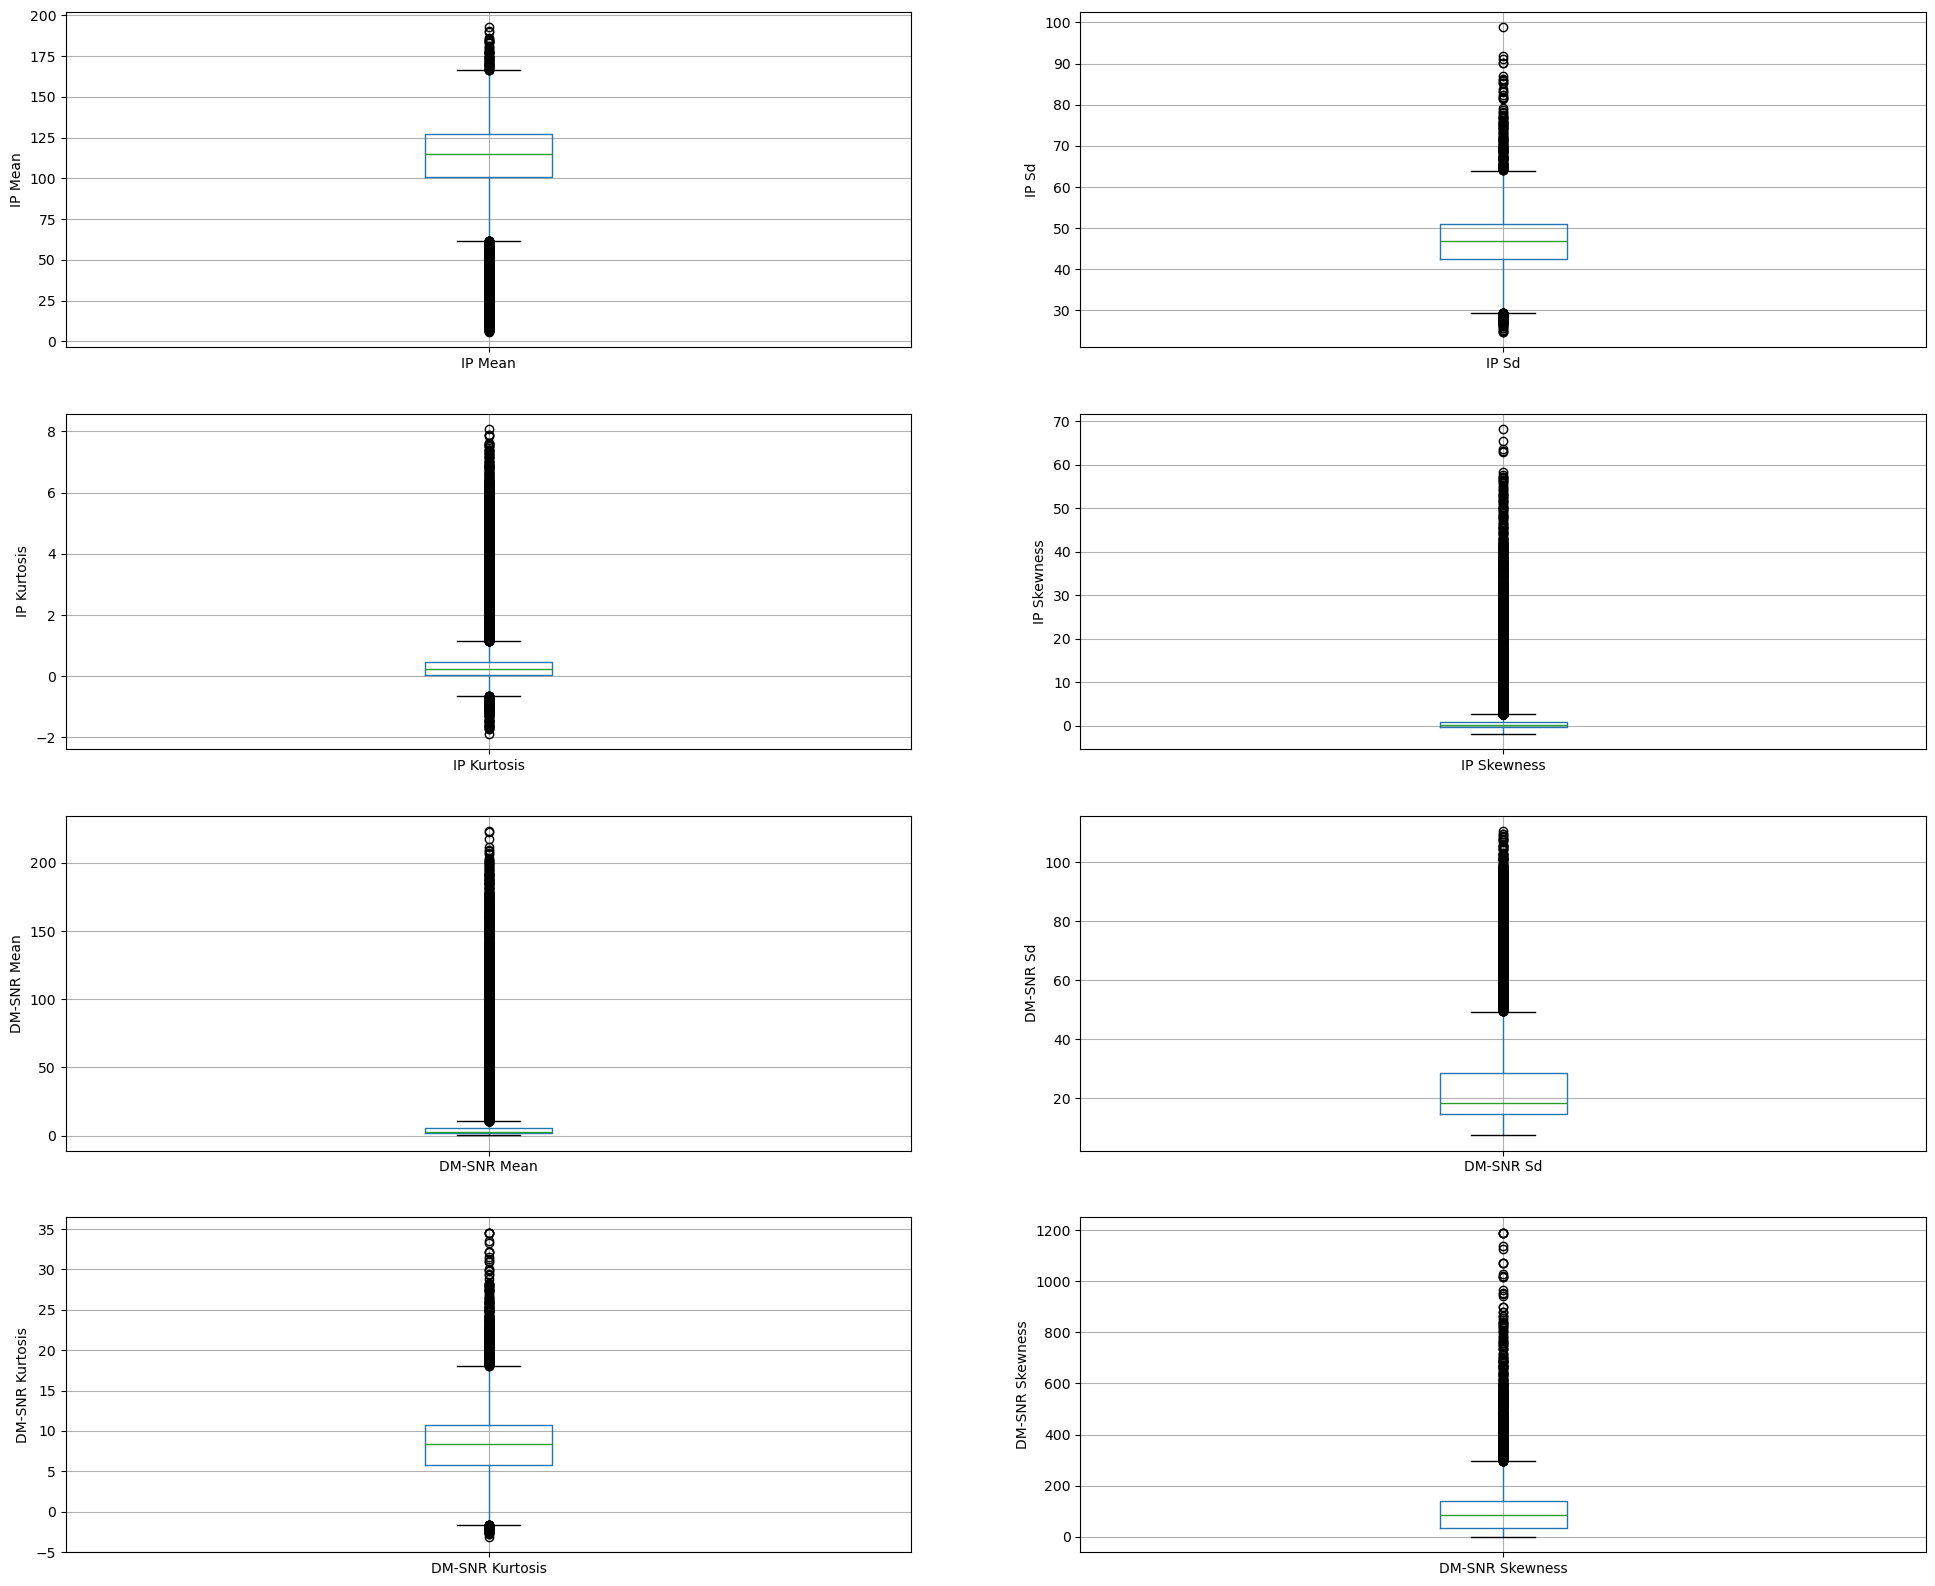

In [17]:
# tracer des diagrammes en boîte pour visualiser les données aberrantes 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Les diagrammes en boîte ci-dessus confirment la présence de nombreuses données aberrantes parmi ces variables. Plusieurs répartitions sont asymétriques et la médiane ne se situe pas au centre de la boîte mais plutôt sur un côté. Il y a aussi déséquilibre au niveau de la longueur des moustaches, soit un côté court sans données aberrantes et un côté long avec plusieurs données aberrantes.

### Gestion des données aberrantes avec les SVM 

Comme nous l’avons vu dans le Carnet 1 des SVM sur la régularisation, il existe deux variantes des SVM, soit à `marge stricte` ou à `marge souple`.

Les `SVM à marge stricte` ne se préoccupent pas des données aberrantes. Nous cherchons dans ce cas à situer l’hyperplan en fonction de la marge maximale afin que chaque point d’entrainement soit correctement classé en fonction d’une marge minimalement de 1. *Cette technique n’est pas une très bonne façon de gérer des données aberrantes.*   

L’autre variante de `SVM` est dite `à marge souple`. Elle permet d’avoir quelques points classés incorrectement ou en fonction d’une marge inférieure à 1. Mais chaque point de ce type entraine une pénalité au niveau du paramètre `C` qui contrôle les données aberrantes. Un `paramètre C bas` signifie que nous tolérerons un plus grand nombre de données aberrantes tandis qu’un `paramètre C élevé` équivaut à moins de données aberrantes. 

Le raisonnement voudrait qu’en présence d’un jeu de données contenant des données aberrantes, une valeur `C` plus élevée soit avantageuse pour l’entrainement du modèle. Un jeu de données comportant un nombre considérable de données aberrantes laisse supposer une asymétrie notable. Nous verrons dans la section Distribution des variables ci-après que ces éléments asymétriques peuvent aussi prendre trop d’importance et aboutir à un surajustement lors de l’entrainement. Nous devrons donc pour y remédier peaufiner les paramètres « d’assouplissement » de notre modèle de SVM.

### Vérifier la distribution des variables

Je tracerai maintenant l’histogramme pour vérifier les différentes distributions et déterminer si celles-ci sont normales ou asymétriques. 

Text(0, 0.5, 'Number of pulsar stars')

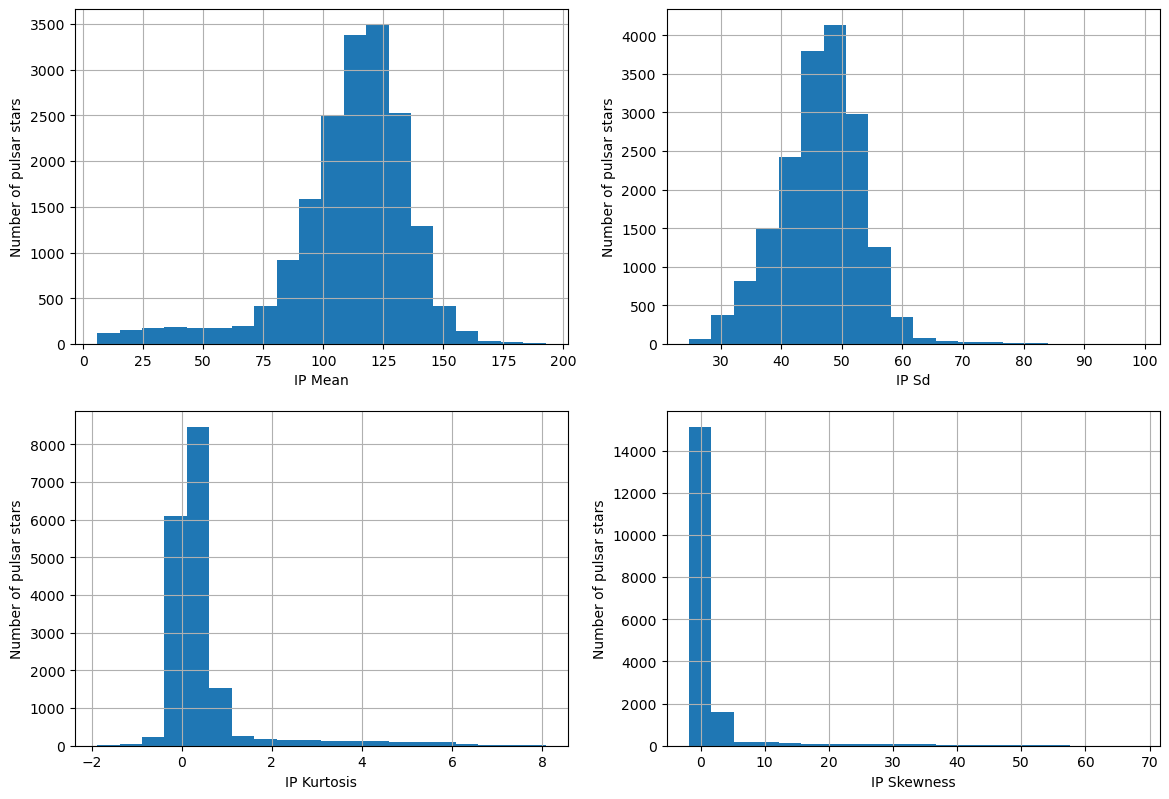

In [18]:
# tracer l’histogramme pour vérifier la distribution 

plt.figure(figsize=(14,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')


Text(0, 0.5, 'Number of pulsar stars')

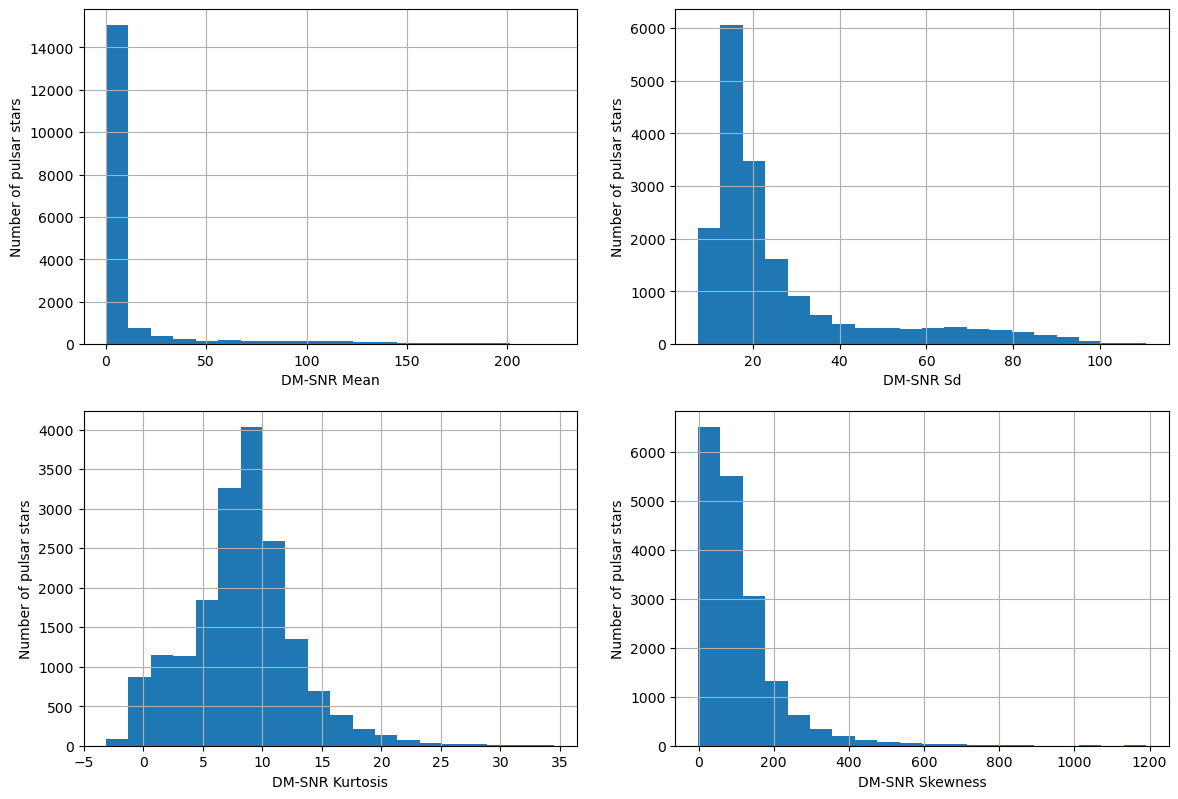

In [19]:
plt.figure(figsize=(14,20))

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

Comme on peut s’y attendre compte tenu de l’analyse préliminaire des données et des diagrammes en boîte, les cinq variables continues sont extrêmement asymétriques tandis que le profil intégré moyen (IP), la déviation standard (Sd) et l’aplatissement (kurtosis) de la modulation delta et du rapport signal/bruit sont répartis de façon assez égale. En termes de SVM, cela signifie qu’un noyau non linéaire est probablement nécessaire pour gérer les données, compte tenu du niveau d’asymétrie et des possibilités de surajustement. Comme nous l’avons constaté avec le jeu de données sur les iris, un niveau raisonnable d’asymétrie peut nous aider à mieux déterminer les caractéristiques les plus importantes. Mais dans ce jeu de données, les éléments asymétriques pourraient avoir trop d’impact et exagérer le biais du modèle au cours de son entrainement. Nous devrons donc pour y remédier peaufiner les paramètres « d’assouplissement » de notre modèle de SVM. Les SVM sont sensibles à l’échelonnage des caractéristiques ce qui signifie que des variables hautement asymétriques pourraient dominer celles qui sont réparties de façon égale en cas de mise à l’échelle déficiente. Nous allons examiner l'échelle des données et l'assouplissement des marges à l'aide du paramètre `C` dans les lignes qui suivent.

### Identifier le vecteur d’attributs et la variable cible 

Pour utiliser le classificateur nous devons générer nos données d’entrainement et les variables des données d’essai.

Nous disposons des éléments suivants pour les données d’entrainement<br>
    - variables X (entrées) : 'IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'<br>
    - variable Y (sortie) : Is_pulsar - yes(1) or no (0)
    
Nous disposons des éléments suivants pour les données d’essai<br>
    - variables X (entrées): 'IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'<br>
    - variable Y (sortie) : Is_pulsar - yes(1) or no (0)
    
Toutes nos variables X représentent les propriétés des signaux mesurables.<br>
Notre variable Y détermine s’il s’agit ou non d’un pulsar.<br>
Générons-les en supprimant les colonnes concernées. 

In [20]:
X = df.drop(['Is_pulsar'], axis=1)

y = df['Is_pulsar']

### Répartir les données en jeu de données d’entrainement et d’essai distincts

In [21]:
# répartir les données X et Y en jeu de données d’entrainement et d’essai

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Nous devons procéder à une vérification superficielle après avoir créé nos jeux de données d’entrainement et d’essai.

In [22]:
# vérifier la forme de X_train et X_test

print("Train rows and columns",X_train.shape)
print("Test rows and columns",X_test.shape)

Train rows and columns (14318, 8)
Test rows and columns (3580, 8)


C’est ce à quoi nous nous attendions. La somme des lignes d’entrainement et d’essai devrait être de 17 898 entrées, donc celles observées précédemment. Nous avons aussi les huit propriétés ou caractéristiques mesurées.

## Mise à l’échelle des données

L’échelle de vos données doit être prise en compte. Les modèles d’apprentissage-machine développent leur cartographie à partir de variables d’entrée pour aboutir à une variable de sortie. À ce titre, l’échelle et la distribution des données associées au domaine peuvent être différentes selon chaque variable. Les variables d’entrée peuvent être d’unités différentes (p., ex., pied, kilomètre et heure) ce qui signifie que les échelles de données seront différentes. 

La normalisation d’un jeu de données requiert que l’on remette la distribution des valeurs à l’échelle afin que la moyenne des valeurs observées soit 0 et que la déviation standard soit représentée par 1. Ce processus peut être perçu comme une soustraction de la valeur moyenne ou le centrage des données. Cette normalisation peut être utile, voire nécessaire pour certains algorithmes d’apprentissage-machine, lorsque les valeurs d’entrée de vos données sont d’échelles différentes ou nettement asymétriques. 

Les différences d’échelle parmi les variables d’entrée peuvent rendre plus complexe le problème faisant l’objet de modélisation. À titre d’exemple, de grandes valeurs d’entrée (p. ex., un éventail de centaines ou de milliers d’unités) peuvent aboutir à un modèle qui n’apprend qu’à partir de fortes valeurs. Un tel modèle est souvent instable, c’est-à-dire sujet à un piètre rendement en termes d’apprentissage et de sensibilité aux valeurs d’entrée, entrainant un plus haut taux d’erreur en matière de généralisation. 

En ce qui concerne nos classificateurs, nous voulons que nos observations épousent une distribution gaussienne (courbe en cloche), accompagnée d’une moyenne normale et d’une déviation standard, aussi étroite que possible. Mais nous avons pu constater que cela ne s’est pas produit lorsque nous avons tracé la distribution de nos variables ci-dessus. 
Fort heureusement, sklearn comporte une fonction intégrée pour nous aider à réaliser cette normalisation le plus facilement possible.

In [23]:
cols = X_train.columns

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [25]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [26]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [27]:
X_train.describe().astype(int)


,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,14318,14318,14318,14318,14318,14318,14318,14318
mean,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1
min,-4,-3,-2,0,0,0,-2,-1
25%,0,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0,0
max,3,7,7,10,7,4,5,10


Nous remarquons que la `moyenne` est de 0 et la déviation standard (`std`) de 1. Nous disposons maintenant de jeux de données `X_train` et `X_test` avec lesquels nous pouvons alimenter le classificateur SVM.

### Lancer le SVM avec les hyperparamètres par défaut

La normalisation d’échelles au niveau des caractéristiques est indispensable pour travailler avec des séparateurs à vaste marge, car les paramètres par défaut sont souvent optimisés en fonction de données normalisées. En l’absence de mise à l’échelle adéquate, les SVM auront de la difficulté à situer les limites décisionnelles optimales, notamment lorsque l’échelle ou la distribution des paramètres varie beaucoup.

Les hyperparamètres représentent des réglages de configuration d’algorithmes d’apprentissage-machine faits avant que ne débute le processus d’apprentissage. Contrairement aux paramètres de modèles appris au cours de l’entrainement à partir de données, les hyperparamètres sont habituellement réglés manuellement ou ajustés à l’aide de techniques d’optimisation.  
Les paramètres par défaut sont `C=1.0`, noyau=`rbf` et gamma=`auto` parmi tant d’autres. 

Le code ci-après entend démontrer le processus de base d’entrainement et d’évaluation d’un séparateur à vaste marge (SVM). Vous trouverez certaines variations dans les cellules ci-dessous, en fonction de divers paramètres et noyaux de SVM :<br>
* Il importe la classe de classification à vecteurs de support (SVC) via scikit-learn et le paramètre des bonnes réponses (accuracy_score).<br>
* Il génère un exemple de SVC en fonction d’un hyperparamètre par défaut. <br>
* Le classificateur opère en fonction des données d’entrainement  (X_train and y_train)<br>
* Le modèle entrainé est ensuite utilisé pour faire des prédictions à partir du jeu de données d’essai (X_test)<br>
* Enfin, le taux de bonnes réponses est calculé et imprimé en comparant les prédictions (y_pred) aux étiquettes exactes (y_test)<br><br>
Les cellules restantes, chacune représentant un noyau et les paramètres de régularisations utilisés, nous permettent d’évaluer le rendement du modèle via un simple paramètre – la précision. Nous pouvons aussi démontrer à quel point le noyau contribue à la capacité de généralisation du modèle à partir des données fortuites « X_test », associées à un jeu de données ambitieux. Cette section est le point de départ d’une analyse plus complexe, comme l’optimisation des hyperparamètres au carnet 3 ou la comparaison avec d’autres noyaux. C’est une façon claire et reproductible d’entrainer et d’évaluer un classificateur de type SVM en fonction de différents noyaux.

In [30]:
# importer le classificateur SVC
from sklearn.svm import SVC

# importer les paramètres de calcul de la précision 
from sklearn.metrics import accuracy_score

# instancier la classificateur en fonction des hyperparamètres par défaut
svc=SVC() 

# ajuster le classificateur en fonction du jeu de données d’entrainement
svc.fit(X_train,y_train)

# faire des prédictions à partir du jeu de données d’essai 
y_pred=svc.predict(X_test)

# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


### Exécuter le SVM avec le noyau rbf et C=100.0

Nous savons que notre jeu de données comporte des données aberrantes. Nous devrions donc augmenter la valeur de C puisqu’une valeur plus élevée de C signifie moins de données aberrantes.

Je vais donc lancer le SVM avec le noyau rbf et une valeur de C=100.0.

In [31]:
# instancier le classificateur en fonction du noyau rbf et de C=100
svc=SVC(C=100.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
svc.fit(X_train,y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=svc.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


Nous pouvons constater que nous obtenons une précision légèrement meilleure avec C=100.0, une valeur plus élevée de C signifiant moins de données aberrantes.

Je vais maintenant accroitre la valeur de C à 1000.0 et vérifier la précision. 

### Exécuter le SVM avec le noyau rbf et C=1000.0


In [32]:
# instancier le classificateur en fonction du noyau rbf et de C=1000
svc=SVC(C=1000.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
svc.fit(X_train,y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=svc.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


Nous constatons maintenant que le degré de précision a baissé avec C=1000.0 car une valeur de `C` très élevée ne tolère pas les violations de marge (classifications erronées), entrainant des risques de surajustement et de ce fait, une réduction de la précision. Comme nous l’avons vu dans le Carnet 1 sur les SVM et la régularisation, en présence d’une valeur de `C` très élevée, la marge devient stricte et des points de données ne peuvent s’y trouver. Le classificateur ne peut plus généraliser de manière adéquate face à des exemples fortuits.  
<br>
<br>
**Conclusion – noyau RBF kernel**<br>
Le noyau RBF, capable de capturer des relations non linéaires, offre un excellent ajustement aux données, de l’ordre de 98 %. 

## Exécuter le SVM avec un noyau linéaire


### Exécuter le SVM avec un noyau linéaire et une valeur de C=1.0


In [33]:
# instancier le classificateur en fonction d’un noyau linéaire et de C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
linear_svc.fit(X_train,y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred_test=linear_svc.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9830


### Exécuter le SVM avec un noyau linéaire et une valeur de C=100.0


In [34]:
# instancier le classificateur en fonction d’un noyau linéaire et de C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
linear_svc100.fit(X_train, y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=linear_svc100.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


### Exécuter le SVM avec un noyau linéaire et une valeur de C=1000.0


In [35]:
# instancier le classificateur en fonction d’un noyau linéaire et de C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
linear_svc1000.fit(X_train, y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=linear_svc1000.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


**Conclusion – noyau linéaire**<br>
Nous constatons qu’il est possible d’obtenir une meilleure précision avec une valeur de   C=100.0 et de C=1000.0 qu’avec celle de C=1.0. Cela donne à penser que le modèle bénéficie d’une approche de classification plus rigoureuse et de moins de régularisation tandis que les données nécessiteront une limite décisionnelle plus complexe pour pouvoir séparer les classes de manière efficace. Comparé à la précision obtenue avec le noyau `RBF` de 98 %, il semblerait qu’un modèle plus simple, basé sur une fonction noyau plus linéaire, suffise et soit même potentiellement plus robuste pour ce genre de classification.

Dans le cas présent, **y_test** sont les vraies étiquettes de classe calculées et **y_pred** sont des étiquettes de classe prédites à partir de l’ensemble de données d’essai. Force est de constater que le niveau de précision des données calculées et des données d’essai est comparable.

## Exécuter le SVM avec un noyau polynomial 


### Exécuter le SVM avec un noyau polynomial et une valeur de C=1.0


In [36]:
# instancier le classificateur en fonction d’un noyau polynomial et de C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
poly_svc.fit(X_train,y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=poly_svc.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


 
 ### Exécuter le SVM avec un noyau polynomial et une valeur de C=100.0
 

In [37]:
# instancier le classificateur en fonction d’un noyau polynomial et de C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
poly_svc100.fit(X_train, y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=poly_svc100.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100 : 0.9824


**Conclusion – noyau polynomial**<br>
Comparé à la précision obtenue avec le noyau RBF de 98%, il semblerait qu’un modèle plus simple, basé sur une fonction noyau plus linéaire, suffise et soit même potentiellement plus robuste pour ce genre de classification.  

## Exécuter le SVM avec un noyau sigmoïde


### Exécuter le SVM avec un noyau sigmoïde et une valeur de C=1.0

In [38]:
# instancier le classificateur en fonction d’un noyau sigmoïde et de C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# ajuster le classificateur en fonction du jeu de données d’entrainement
sigmoid_svc.fit(X_train,y_train)

# faire des prédictions à partir du jeu de données d’essai
y_pred=sigmoid_svc.predict(X_test)

# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


### Exécuter le SVM avec un noyau sigmoïde et une valeur de C=100.0

In [39]:
# instancier le classificateur en fonction d’un noyau sigmoïde et de C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# ajuster le classificateur en fonction du jeu de données d’entrainement
sigmoid_svc100.fit(X_train,y_train)


# faire des prédictions à partir du jeu de données d’essai
y_pred=sigmoid_svc100.predict(X_test)


# calculer et imprimer le taux de bonnes réponses
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


**Conclusion – noyau sigmoïde**<br>
Nous constatons qu’un noyau sigmoïde performe nettement moins bien que les noyaux précédents. La précision obtenue avec une petite ou grande valeur de `C` est similaire, ce qui laisse présager un surajustement. Ce résultat confirme la probabilité que le jeu de données puisse être séparé linéairement.   

### Conclusion

Nous avons utilisé un séparateur à vaste marge pour classifier un ensemble de données sur la **prédiction de pulsars**. En d’autres termes, l’utilisation de SVM pour analyser des données sur les pulsars nous aide à déterminer quelles étoiles sont des pulsars et lesquelles ne le sont pas, en traçant entre elles des lignes ou des courbes intelligentes, tout en gardant les choses simples et faciles à comprendre. Nous avons constaté que ce jeu de données est déséquilibré. Dans pareille situation, les SVM utilisent l’astuce du noyau pour transformer les données à l’aide d’une fonction de cartographie qui transforme l’espace d’entrée bidimensionnel en espace tridimensionnel, nous permettant ainsi de séparer plus facilement les points de données par séparation linéaire.

Le paramètre `C` est aussi un facteur important lors de l’utilisation de fonctions de noyaux. En effet, ce paramètre compense des erreurs en tolérant certaines violations de marge (classifications erronées). Autrement dit, il permet à certains points de s’immiscer dans la marge (voir le Carnet 1), si ces derniers offrent un meilleur ajustement entre le modèle et les données.  La valeur de `C` déterminera le niveau de tolérance de telles violations :
* Avec une valeur de `C` très élevée, la tolérance des violations de marge est plus stricte et certains points ne peuvent accéder à la marge. 
* Avec une valeur de `C` plus petite, la tolérance des violations de marge est moins stricte et la marge peut alors englober davantage de points. 
<br>
**Une remarque à propos de la précision**<br>
La précision (nombre de prédictions exactes / nombre total de prédictions) est une mesure adéquate pour les jeux de données équilibrés dans lesquels les classes sont représentées de manière égale, et qui de ce fait constitue une évaluation juste et intuitive du rendement global du modèle. Mais dans le présent tutoriel, le jeu de données sur les étoiles qui sont des pulsars est **déséquilibré**. Calculer le degré de précision avec des jeux de données déséquilibrés dont la répartition des classes est considérablement inégale, peut nous induire en erreur. Un modèle peut, dans pareil cas, atteindre un haut degré de précision simplement en générant des prédictions au regard de la classe majoritaire en omettant complétement d’identifier la classe n minoritaire. Cela est problématique lorsque la classe minoritaire nous importe davantage ou que les coûts liés à une classification erronée diffèrent d’une classe à une autre. Pour pouvoir comparer des modèles de SVM associés à différents paramètres de régularisation et à différents noyaux, nous avons choisi d’utiliser la précision comme simple paramètre d’analyse comparative et **NON** comme un paramètre de qualité de la valeur prédictive.

En présence de jeux de données déséquilibrés, d’autres paramètres comme le score F1 ou AUC-ROC (aire sous la courbe ROC), réussiront mieux à calculer la qualité de la valeur prédictive car ils offrent une vue plus nuancée du rendement du modèle sur l’ensemble des classes, notamment la capacité du modèle à classifier correctement les échantillons sous-représentés. Il reviendra à l’étudiant d’envisager le score F1 ou AUC-ROC comme autres options de mesure de la précision.  
Nous vous avons montré dans ce tutoriel comment un noyau transpose un espace de faible dimension en un espace de dimension supérieure. Il convertit les données problématiques séparables mais non linéaires en problématiques linéaires séparables, en les transposant dans une dimension supérieure. L’astuce du noyau nous permet donc d’obtenir un classificateur plus précis puisque les hypothèses de linéarité ne s’appliquent pas souvent aux jeux de données liés à la réalité. À l’instar des phénomènes que représentent les points de données, les jeux de données sont désordonnés : ils contiennent des variations aléatoires, des erreurs, des anomalies, anomalies ou des événements complexes non linéaires. Cette complexité crée du « bruit » parmi les données, bruit qui aura une incidence sur la valeur prédictive de l’algorithme d’apprentissage-machine.

Nous avons utilisé un séparateur à vaste marge pour classifier un **ensemble de données sur la prédiction de pulsars**. Ce jeu de données est utile pour en connaitre davantage sur les SVM à noyau car les points de données échantillonnés sont si dispersés que l’on ne peut les séparer en fonction d’un hyperplan linéaire.

Dans pareille situation, les SVM utilisent l’astuce du noyau pour transformer les données à l’aide d’une fonction de cartographie qui transforme l’espace d’entrée bidimensionnel en espace tridimensionnel, nous permettant ainsi de séparer plus facilement les points de données par séparation linéaire.

Ce jeu de données comporte un certain bruit car tous les signaux ne sont pas réels. « Le jeu de données utilisé ici contient 16 259 exemples parasites résultant d’interférences radioélectriques et de bruit, et de 1 639 véritables exemples de pulsars. Tous ces exemples ont été vérifiés par des annotateurs humains. » Les noyaux de SVM peuvent faciliter l’identification de signaux comme étant de véritables pulsars (positifs) ou non (négatifs).

Nous obtenons la plus haute précision avec le noyau RBF et le noyau linéaire kernel et une valeur de C=100.0. La précision est alors de 0.9832. Compte tenu de l’analyse qui précède, il est permis de conclure que notre modèle de classification est d’une très bonne précision. Notre modèle excelle-t-il à prédire les étiquettes de classe ?  
Nous avons ici affaire à un jeu de données déséquilibré. Le problème est que la précision n’est pas une mesure adéquate pour quantifier le rendement prédictif avec un jeu de données déséquilibré.

La précision calcule la proportion globale de prédictions correctes. Mais en présence d’un déséquilibre, nous nous soucions davantage du rendement au regard de la classe minoritaire. 
* Un haut taux de précision peut être obtenu en considérant toutes les prédictions comme relevant de la classe majoritaire.  
* Le degré de précision ne fait aucune distinction entre les types d’erreurs survenues (fausses positives v. fausses négatives). Le coût de ces erreurs diffère selon les jeux de données asymétriques.  

Nous devons donc envisager d’autres paramètres capables de mieux orienter la sélection des modèles. Nous aimerions notamment connaitre la distribution sous-jacente des valeurs et le type d’erreurs commises par notre classificateur.

* Des paramètres comme la précision, le rappel, le score F1 ou AUC-ROC (aire sous la courbe ROC), réussiront mieux à quantifier le rendement avec des données déséquilibrées. Nous introduirons dans le prochain tutoriel des représentations visuelles de jeux de données pour comprendre comment les différentes fonctions de noyau des classificateurs SVM agissent sur les limites décisionnelles et les marges apprises par le modèle.

## Veuillez entreprendre le Carnet 3 sur les SVM : la visualisation d’hyperplans